In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ft_min_max_norm(minmax, num):
    return(((num - minmax['min']) / (minmax['max'] - minmax['min'])))

def ft_min_max_denorm(minmax, num):
    return(num * (minmax['max'] - minmax['min']) + minmax['min'])

def predict_price(theta, norm_km):
    return theta[0] + theta[1] * norm_km

def gradient_des(n, theta, norm_km, norm_price, theta_tmp, cost_t, error_cost):
    for i in range(n):
        price_pred = predict_price(theta, norm_km[i])
        error_cost += (norm_price[i] - price_pred)**2
        theta_tmp[0] += (price_pred - norm_price[i])
        theta_tmp[1] += ((price_pred - norm_price[i]) * norm_km[i])
        cost_t[0] += theta_tmp[0] * (-2)
        cost_t[1] += theta_tmp[1] * (-2)
    return(theta_tmp, error_cost)

In [23]:
data_file = pd.read_csv('data.csv')
print(data_file)

km = np.array(data_file.iloc[:,:-1].values, dtype='float64')
price = np.array(data_file.iloc[:,1].values, dtype='float64')
n = np.size(km)
print("Size =", n)

        km  price
0   240000   3650
1   139800   3800
2   150500   4400
3   185530   4450
4   176000   5250
5   114800   5350
6   166800   5800
7    89000   5990
8   144500   5999
9    84000   6200
10   82029   6390
11   63060   6390
12   74000   6600
13   97500   6800
14   67000   6800
15   76025   6900
16   48235   6900
17   93000   6990
18   60949   7490
19   65674   7555
20   54000   7990
21   68500   7990
22   22899   7990
23   61789   8290
Size = 24


In [24]:
minmaxKm = {'min': float(min(km)), 'max': float(max(km))}
minmaxPr = {'min': min(price), 'max': max(price)}
print(minmaxKm, minmaxPr)

%f %f {'min': 22899.0, 'max': 240000.0} {'min': 3650.0, 'max': 8290.0}


In [26]:
norm_km = ft_min_max_norm(minmaxKm, km)
norm_price = ft_min_max_norm(minmaxPr, price)
print(norm_km)

print(norm_price)

[[1.        ]
 [0.53846366]
 [0.58774948]
 [0.74910295]
 [0.70520633]
 [0.42330989]
 [0.66282974]
 [0.30447119]
 [0.56011257]
 [0.28144044]
 [0.27236171]
 [0.18498763]
 [0.23537893]
 [0.34362347]
 [0.20313587]
 [0.24470638]
 [0.11670144]
 [0.3228958 ]
 [0.17526405]
 [0.19702811]
 [0.1432559 ]
 [0.21004509]
 [0.        ]
 [0.17913321]]
[0.         0.03232759 0.16163793 0.17241379 0.34482759 0.36637931
 0.46336207 0.50431034 0.50625    0.54956897 0.59051724 0.59051724
 0.63577586 0.67887931 0.67887931 0.70043103 0.70043103 0.71982759
 0.82758621 0.84159483 0.93534483 0.93534483 0.93534483 1.        ]


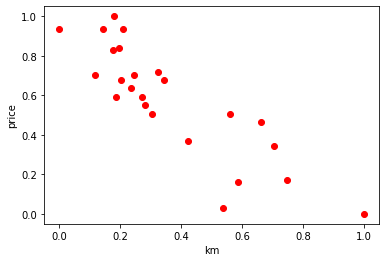

In [6]:
plt.scatter(norm_km,norm_price, color = 'red')
plt.xlabel("km")
plt.ylabel("price")
plt.show()

In [27]:
theta = [0.0,0.0]
lr = 0.1
epoches = 4000
error = []
regr = [[],[]]

for epoch in range(epoches):
    error_cost = 0
    cost_t = [0.0, 0.0]
    theta_tmp = [0.0, 0.0]
    theta_tmp, error_cost = gradient_des(n, theta, norm_km, norm_price, theta_tmp, cost_t, error_cost)
    theta[0] -= lr * (theta_tmp[0] / n)
    theta[1] -= lr * (theta_tmp[1] / n)
    if(epoch % 100 == 0):
        print(epoch,theta[0],theta[1])
        regr[0].append(epoch)
        regr[1].append(predict_price(theta,norm_km))
    error.append(error_cost)

0 [0.05779813] [0.01514862]
100 [0.66686136] [-0.28442783]
200 [0.77367998] [-0.56636948]
300 [0.8386188] [-0.73777637]
400 [0.87809832] [-0.84198312]
500 [0.90209989] [-0.90533557]
600 [0.91669163] [-0.94385067]
700 [0.92556267] [-0.96726591]
800 [0.93095582] [-0.98150119]
900 [0.93423458] [-0.99015553]
1000 [0.9362279] [-0.99541693]
1100 [0.93743974] [-0.9986156]
1200 [0.93817648] [-1.00056022]
1300 [0.93862438] [-1.00174246]
1400 [0.93889668] [-1.0024612]
1500 [0.93906222] [-1.00289816]
1600 [0.93916286] [-1.0031638]
1700 [0.93922405] [-1.0033253]
1800 [0.93926125] [-1.00342349]
1900 [0.93928386] [-1.00348318]
2000 [0.93929761] [-1.00351947]
2100 [0.93930597] [-1.00354153]
2200 [0.93931105] [-1.00355494]
2300 [0.93931414] [-1.0035631]
2400 [0.93931602] [-1.00356806]
2500 [0.93931716] [-1.00357107]
2600 [0.93931785] [-1.0035729]
2700 [0.93931828] [-1.00357402]
2800 [0.93931853] [-1.00357469]
2900 [0.93931869] [-1.0035751]
3000 [0.93931878] [-1.00357535]
3100 [0.93931884] [-1.00357551

Theta0 = [0.93931893]
Theta1 = [-1.00357574]


Text(0, 0.5, 'price')

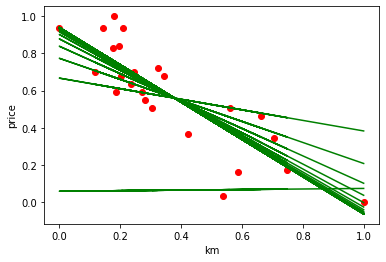

In [30]:
print("Theta0 =", theta[0])
print("Theta1 =", theta[1])

plt.scatter(norm_km,norm_price,color = 'red')
for i in range (len(regr[1])):
    plt.plot(norm_km,regr[1][i],color = 'green')
plt.xlabel("km")
plt.ylabel("price")

Text(0, 0.5, 'Error')

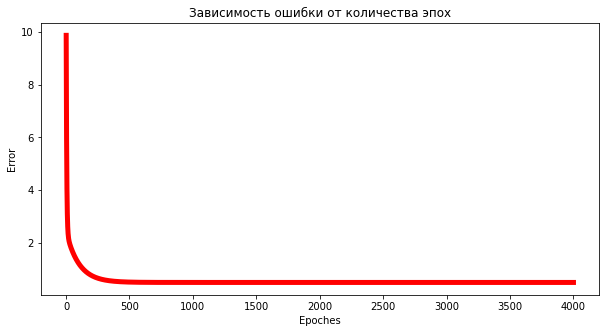

In [31]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,len(error)+1),error,color='red',linewidth = 5)
plt.title("Зависимость ошибки от количества эпох")
plt.xlabel("Epoches")
plt.ylabel("Error")

Text(0, 0.5, 'price')

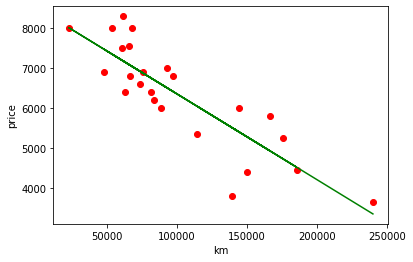

In [32]:
price_lenreg = ft_min_max_denorm(minmaxPr, predict_price(theta,norm_km))

plt.scatter(km,price,color = 'red')
plt.plot(km,price_lenreg,color = 'green')
plt.xlabel("km")
plt.ylabel("price")

In [36]:
mse = (np.sum((norm_price - predict_price(theta,norm_km).T) ** 2)) / float(n)
print("mean squared error is", mse)

mean squared error is 0.02069918833007921


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
experience = norm_km.reshape(-1,1)
model = LinearRegression()
model.fit(norm_km,norm_price)
price_pred = model.predict(norm_km)
print(norm_km)
print(norm_price)
print( ft_min_max_denorm(minmaxPr, model.predict([[ft_min_max_norm(minmaxKm, 1000000)]])))
Mse = mean_squared_error(norm_price, price_pred)
print('slop', model.coef_)
print("Intercept", model.intercept_)
print("MSE", Mse)

[[1.        ]
 [0.53846366]
 [0.58774948]
 [0.74910295]
 [0.70520633]
 [0.42330989]
 [0.66282974]
 [0.30447119]
 [0.56011257]
 [0.28144044]
 [0.27236171]
 [0.18498763]
 [0.23537893]
 [0.34362347]
 [0.20313587]
 [0.24470638]
 [0.11670144]
 [0.3228958 ]
 [0.17526405]
 [0.19702811]
 [0.1432559 ]
 [0.21004509]
 [0.        ]
 [0.17913321]]
[0.         0.03232759 0.16163793 0.17241379 0.34482759 0.36637931
 0.46336207 0.50431034 0.50625    0.54956897 0.59051724 0.59051724
 0.63577586 0.67887931 0.67887931 0.70043103 0.70043103 0.71982759
 0.82758621 0.84159483 0.93534483 0.93534483 0.93534483 1.        ]
[-12949.36394177]
slop [-1.00357574]
Intercept 0.9393189294497466
MSE 0.020699188330079207


390000 km = [134.50386555]


Text(0, 0.5, 'price')

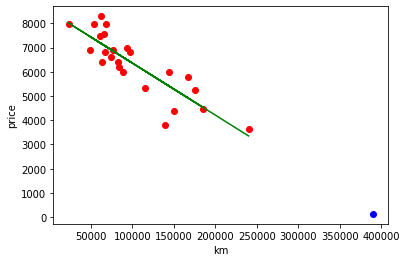

In [17]:
k=390000#  5990
p=ft_min_max_denorm(minmaxPr, predict_price(theta, ft_min_max_norm(minmaxKm, k)))
print(k, "km =", p)
plt.scatter(km,price,color = 'red')
plt.plot(km,price_lenreg,color = 'green')
plt.scatter(k,p,color = 'blue')
plt.xlabel("km")
plt.ylabel("price")